In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
from google.colab import files

In [9]:
files.upload()

Saving diabetes.csv to diabetes (1).csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [10]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd037aa9048>,
      dtype=object)

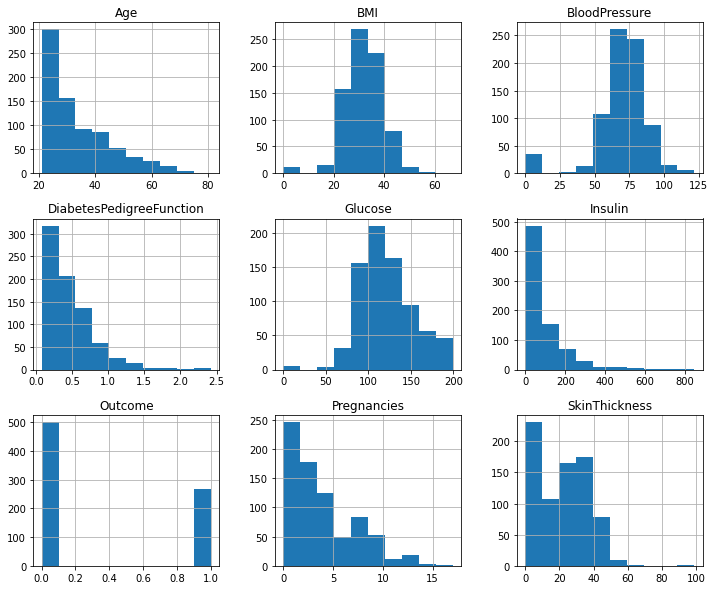

In [14]:
df.hist(figsize=(12,10))

In [15]:
X,Y = df.iloc[:,:-1],df.iloc[:,-1]
print(X.shape,Y.shape)

(768, 8) (768,)


In [16]:
s= StandardScaler()
X = s.fit_transform(X)
Y= np.array(Y)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size =0.3, random_state = 42)

In [18]:
print("Training Shape",X_train.shape,Y_test.shape)
print("Testing Shape",X_test.shape,Y_test.shape)

Training Shape (537, 8) (231,)
Testing Shape (231, 8) (231,)


In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,validation_data=(X_test, Y_test))

Epoch 1/100
17/17 [==============================] - 0s 12ms/step - loss: 0.6679 - accuracy: 0.6536 - val_loss: 0.6754 - val_accuracy: 0.6104
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6667 - val_loss: 0.6560 - val_accuracy: 0.6580
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.6816 - val_loss: 0.6406 - val_accuracy: 0.6580
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.6778 - val_loss: 0.6282 - val_accuracy: 0.6537
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5999 - accuracy: 0.6704 - val_loss: 0.6180 - val_accuracy: 0.6364
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.6853 - val_loss: 0.6093 - val_accuracy: 0.6320
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.6872 - val_loss: 0.6019 - val_accuracy: 0.6494
Epoch 8/100


In [23]:
model.evaluate(X_test, Y_test)[1]

8/8 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7489


0.7489177584648132

In [32]:
model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [25]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, Y_test))

Epoch 1/100
17/17 [==============================] - 0s 10ms/step - loss: 0.6551 - accuracy: 0.5922 - val_loss: 0.6268 - val_accuracy: 0.6190
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5848 - accuracy: 0.6555 - val_loss: 0.5822 - val_accuracy: 0.6883
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.6965 - val_loss: 0.5568 - val_accuracy: 0.6883
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5199 - accuracy: 0.7244 - val_loss: 0.5394 - val_accuracy: 0.7056
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7300 - val_loss: 0.5246 - val_accuracy: 0.7229
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.7523 - val_loss: 0.5136 - val_accuracy: 0.7359
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.7672 - val_loss: 0.5066 - val_accuracy: 0.7403
Epoch 8/100


In [27]:
model_2.evaluate(X_test, Y_test)[1]

8/8 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.7489


0.7489177584648132

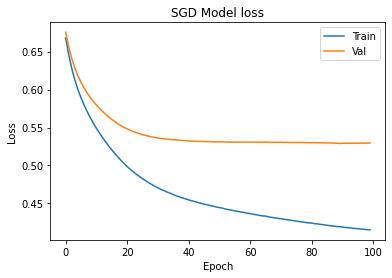

In [28]:
#sgd
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('SGD Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

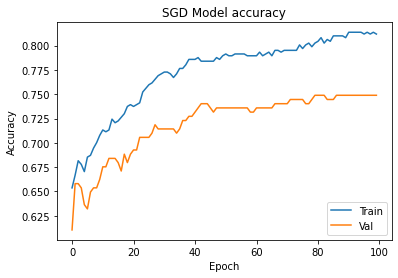

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('SGD Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

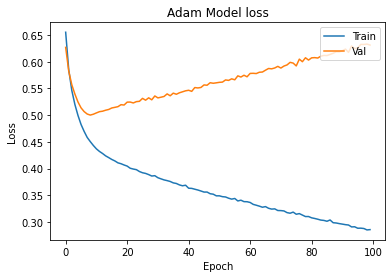

In [30]:
#adam
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Adam Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

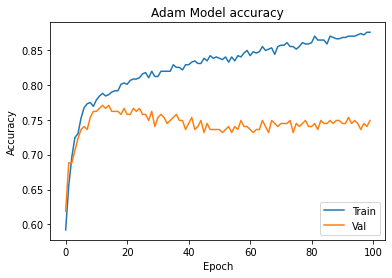

In [31]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Adam Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

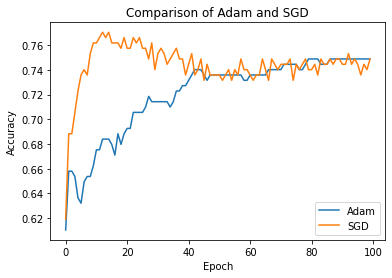

In [37]:
#Comparison of Adam and SGD (Accuracy)
plt.plot(hist.history['val_accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Comparison of Adam and SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','SGD'], loc='lower right')
plt.show()

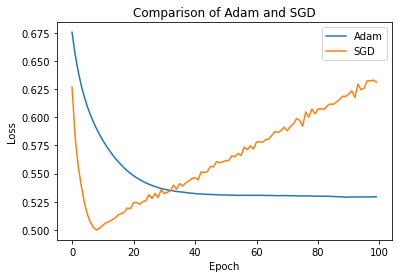

In [38]:
#Comparison of Adam and SGD (Loss)
plt.plot(hist.history['val_loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Comparison of Adam and SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Adam','SGD'], loc='upper right')
plt.show()